# Import Libraries

In [61]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

%matplotlib inline

# Load the Dataset

In [62]:
#read the train and test dataset
df_train = pd.read_csv('../datasets/train.csv')
#check first fivr rows
df_train.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [64]:
#shape of Dataframe train
df_train.shape

(2051, 81)

In [65]:
# dataframe info train
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
Id                 2051 non-null int64
PID                2051 non-null int64
MS SubClass        2051 non-null int64
MS Zoning          2051 non-null object
Lot Frontage       1721 non-null float64
Lot Area           2051 non-null int64
Street             2051 non-null object
Alley              140 non-null object
Lot Shape          2051 non-null object
Land Contour       2051 non-null object
Utilities          2051 non-null object
Lot Config         2051 non-null object
Land Slope         2051 non-null object
Neighborhood       2051 non-null object
Condition 1        2051 non-null object
Condition 2        2051 non-null object
Bldg Type          2051 non-null object
House Style        2051 non-null object
Overall Qual       2051 non-null int64
Overall Cond       2051 non-null int64
Year Built         2051 non-null int64
Year Remod/Add     2051 non-null int64
Roof Style         20

In [66]:
#check nulls train
df_train.isnull().sum()

Id                   0
PID                  0
MS SubClass          0
MS Zoning            0
Lot Frontage       330
Lot Area             0
Street               0
Alley             1911
Lot Shape            0
Land Contour         0
Utilities            0
Lot Config           0
Land Slope           0
Neighborhood         0
Condition 1          0
Condition 2          0
Bldg Type            0
House Style          0
Overall Qual         0
Overall Cond         0
Year Built           0
Year Remod/Add       0
Roof Style           0
Roof Matl            0
Exterior 1st         0
Exterior 2nd         0
Mas Vnr Type        22
Mas Vnr Area        22
Exter Qual           0
Exter Cond           0
                  ... 
Half Bath            0
Bedroom AbvGr        0
Kitchen AbvGr        0
Kitchen Qual         0
TotRms AbvGrd        0
Functional           0
Fireplaces           0
Fireplace Qu      1000
Garage Type        113
Garage Yr Blt      114
Garage Finish      114
Garage Cars          1
Garage Area

In [67]:
#drop columns train
df_train.drop(['Alley','Fireplace Qu','Pool QC','Fence','Misc Feature'], axis=1, inplace= True)

In [68]:
#drop nulls train
df_train.dropna(inplace=True)

In [69]:
#check nulls train
df_train.isnull().sum()

Id                0
PID               0
MS SubClass       0
MS Zoning         0
Lot Frontage      0
Lot Area          0
Street            0
Lot Shape         0
Land Contour      0
Utilities         0
Lot Config        0
Land Slope        0
Neighborhood      0
Condition 1       0
Condition 2       0
Bldg Type         0
House Style       0
Overall Qual      0
Overall Cond      0
Year Built        0
Year Remod/Add    0
Roof Style        0
Roof Matl         0
Exterior 1st      0
Exterior 2nd      0
Mas Vnr Type      0
Mas Vnr Area      0
Exter Qual        0
Exter Cond        0
Foundation        0
                 ..
Gr Liv Area       0
Bsmt Full Bath    0
Bsmt Half Bath    0
Full Bath         0
Half Bath         0
Bedroom AbvGr     0
Kitchen AbvGr     0
Kitchen Qual      0
TotRms AbvGrd     0
Functional        0
Fireplaces        0
Garage Type       0
Garage Yr Blt     0
Garage Finish     0
Garage Cars       0
Garage Area       0
Garage Qual       0
Garage Cond       0
Paved Drive       0


## Converting Ordinal Categorical Variable to numerical

In [70]:
def lot_shape(st):
    if st == 'IR3':
        return 1
    elif st == 'IR2':
        return 2
    elif st == 'IR1':
        return 3
    elif st == 'Reg':
        return 4

In [71]:
def utilities(st):
    if st == 'NA':
        return 0
    if st== 'ELO' or st=='No':
        return 1
    elif st == 'NoSeWa' or st=='Mn':
        return 2
    elif st == 'NoSewr' or st=='Av':
        return 3
    elif st == 'AllPub' or st=='Gd':
        return 4

In [72]:
def land_slope(st):
    if st == 'Sev':
        return 1
    elif st == 'Mod':
        return 2
    elif st == 'Gtl':
        return 3

In [73]:
def exter_qual(st):
    if st == 'NA':
        return 0
    if st=='Po':
        return 1
    if st =='Fa':
        return 2
    if st == 'TA':
        return 3
    if st == 'Gd':
        return 4
    if st == 'Ex':
        return 5

In [74]:
def bsmt_type(st):
    if st == 'NA':
        return 0
    if st =='Unf':
        return 1
    if st == 'LwQ':
        return 2
    if st == 'Rec':
        return 3
    if st == 'BLQ':
        return 4
    if st == 'ALQ':
        return 5
    if st == 'GLQ':
        return 6

In [75]:
df_train['Street']= df_train['Street'].map(lambda st: 0 if st == 'Grvl' else 1)

df_train['Lot Shape']= df_train['Lot Shape'].apply(lot_shape)

df_train['Utilities']= df_train['Utilities'].apply(utilities)

df_train['Land Slope']= df_train['Land Slope'].apply(land_slope)

df_train['Exter Cond'] = df_train['Exter Cond'].apply(exter_qual)

df_train['Exter Qual']= df_train['Exter Qual'].apply(exter_qual)

df_train['Bsmt Qual']= df_train['Bsmt Qual'].apply(exter_qual)
df_train['Bsmt Cond']= df_train['Bsmt Cond'].apply(exter_qual)

df_train['Bsmt Exposure']= df_train['Bsmt Exposure'].apply(utilities)

df_train['Garage Qual']= df_train['Garage Qual'].apply(exter_qual)
df_train['Garage Cond']= df_train['Garage Cond'].apply(exter_qual)

df_train['BsmtFin Type 1']= df_train['BsmtFin Type 1'].apply(bsmt_type)
df_train['BsmtFin Type 2']= df_train['BsmtFin Type 2'].apply(bsmt_type)

df_train['Heating QC']= df_train['Heating QC'].apply(exter_qual)

In [76]:
#filter dataframe with datatype exclude= object
df_train_num = df_train.select_dtypes(exclude=['object'])
df_train_num.head()

,Id,PID,MS SubClass,Lot Frontage,Lot Area,Street,Lot Shape,Utilities,Land Slope,Overall Qual,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
1,544,531379050,60,43.0,11492,1,3,4,3,7,...,0,74,0,0,0,0,0,4,2009,220000
2,153,535304180,20,68.0,7922,1,4,4,3,5,...,0,52,0,0,0,0,0,1,2010,109000
3,318,916386060,60,73.0,9802,1,4,4,3,5,...,100,0,0,0,0,0,0,4,2010,174000
4,255,906425045,50,82.0,14235,1,3,4,3,6,...,0,59,0,0,0,0,0,3,2010,138500
5,138,535126040,20,137.0,16492,1,3,4,3,6,...,0,0,0,0,0,0,0,6,2010,190000


In [77]:
df_train_num.drop(['Id','PID','Utilities'],axis= 1, inplace= True)

/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


## Feature Engineering

In [78]:
# Exterior Quality (EQ) * Exterior Condition (EC)
df_train_num['EQ_EC']= df_train_num['Exter Qual']* df_train_num['Exter Cond']

# Basement Quality (BQ) * Basement condition (BC)
df_train_num['BQ_BC']= df_train_num['Bsmt Cond']* df_train_num['Bsmt Qual']


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [79]:
#filter data type include= object
df_train_cat = df_train.select_dtypes(include=['object'])
df_train_cat.head()

,MS Zoning,Land Contour,Lot Config,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Roof Style,Roof Matl,...,Foundation,Heating,Central Air,Electrical,Kitchen Qual,Functional,Garage Type,Garage Finish,Paved Drive,Sale Type
1,RL,Lvl,CulDSac,SawyerW,Norm,Norm,1Fam,2Story,Gable,CompShg,...,PConc,GasA,Y,SBrkr,Gd,Typ,Attchd,RFn,Y,WD
2,RL,Lvl,Inside,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,...,CBlock,GasA,Y,SBrkr,Gd,Typ,Detchd,Unf,Y,WD
3,RL,Lvl,Inside,Timber,Norm,Norm,1Fam,2Story,Gable,CompShg,...,PConc,GasA,Y,SBrkr,TA,Typ,BuiltIn,Fin,Y,WD
4,RL,Lvl,Inside,SawyerW,Norm,Norm,1Fam,1.5Fin,Gable,CompShg,...,PConc,GasA,Y,SBrkr,TA,Typ,Detchd,Unf,N,WD
5,RL,Lvl,Corner,NAmes,PosA,Norm,1Fam,1Story,Gable,CompShg,...,CBlock,GasA,Y,SBrkr,Gd,Mod,Attchd,Fin,Y,WD


# Distribution of Target Variable

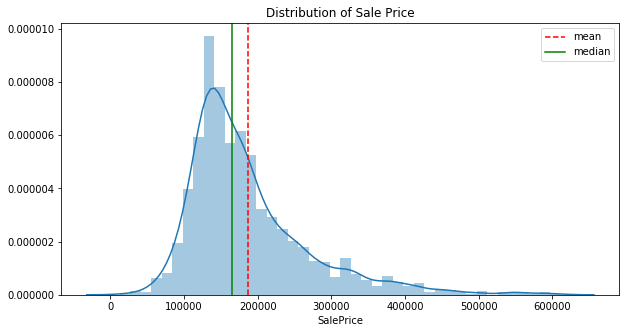

In [80]:
# Plot the distribution of the Sale Price column
plt.figure(figsize = (10,5))
sns.distplot(df_train['SalePrice'])
plt.axvline(df_train['SalePrice'].mean(), color='r', linestyle='--', label='mean')
plt.axvline(df_train['SalePrice'].median(), color='g', linestyle='-', label='median')
plt.legend()
plt.title("Distribution of Sale Price");

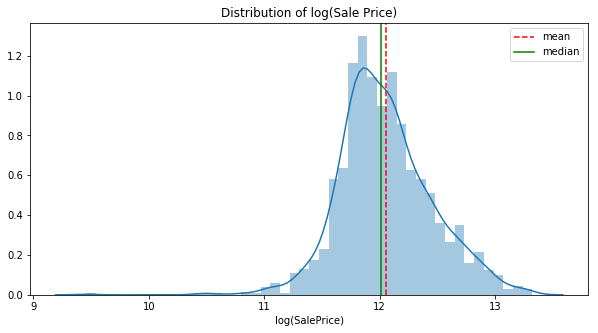

In [81]:
# Plot the distribution of the Sale Price column with log transformation
plt.figure(figsize = (10,5))
sns.distplot(np.log(df_train['SalePrice']))
plt.axvline(np.log(df_train['SalePrice']).mean(), color='r', linestyle='--', label= 'mean')
plt.axvline(np.log(df_train['SalePrice']).median(), color='g', linestyle='-', label='median')
plt.legend()
plt.title("Distribution of log(Sale Price)")
plt.xlabel("log(SalePrice)");

In [82]:
#summary statistics of numerical variables
df_train_num.describe()

,MS SubClass,Lot Frontage,Lot Area,Street,Lot Shape,Land Slope,Overall Qual,Overall Cond,Year Built,Year Remod/Add,...,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice,EQ_EC,BQ_BC
count,1556.000000,1556.000000,1556.000000,1556.000000,1556.000000,1556.000000,1556.000000,1556.000000,1556.000000,1556.000000,...,1556.000000,1556.000000,1556.000000,1556.000000,1556.000000,1556.000000,1556.000000,1556.000000,1556.000000,1556.000000
mean,56.262853,69.361825,9673.904242,0.998072,3.658098,2.951799,6.239075,5.586118,1972.791774,1985.158098,...,21.818766,2.588689,17.543059,2.325835,51.721722,6.201799,2007.775707,186225.881105,10.640103,10.887532
std,42.370616,23.147358,4917.295591,0.043881,0.541588,0.225946,1.395229,1.061898,30.627253,21.144809,...,59.490121,25.613184,58.749149,36.489278,609.036099,2.747537,1.322747,82116.659278,2.166458,2.588537
min,20.000000,21.000000,1300.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1879.000000,1950.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000,4.000000,2.000000
25%,20.000000,59.000000,7440.750000,1.000000,3.000000,3.000000,5.000000,5.000000,1953.750000,1965.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,132000.000000,9.000000,9.000000
50%,50.000000,69.000000,9350.000000,1.000000,4.000000,3.000000,6.000000,5.000000,1976.000000,1994.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,165000.000000,9.000000,12.000000
75%,70.000000,80.000000,11216.500000,1.000000,4.000000,3.000000,7.000000,6.000000,2003.000000,2005.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,215000.000000,12.000000,12.000000
max,190.000000,313.000000,70761.000000,1.000000,4.000000,3.000000,10.000000,9.000000,2010.000000,2010.000000,...,432.000000,508.000000,480.000000,800.000000,17000.000000,12.000000,2010.000000,611657.000000,25.000000,20.000000


In [83]:
# corelation of numerical variables
df_train_num.corr()

,MS SubClass,Lot Frontage,Lot Area,Street,Lot Shape,Land Slope,Overall Qual,Overall Cond,Year Built,Year Remod/Add,...,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice,EQ_EC,BQ_BC
MS SubClass,1.000000,-0.402022,-0.302582,0.034169,0.020369,0.027186,0.045528,-0.095359,0.054469,0.037748,...,-0.050990,-0.016596,-0.029765,-0.003625,-0.046096,0.010128,-0.021908,-0.085244,-0.005519,0.067347
Lot Frontage,-0.402022,1.000000,0.560038,-0.053129,-0.127450,-0.061340,0.211656,-0.036131,0.108912,0.086284,...,0.005621,0.036474,0.075114,0.120770,0.053183,-0.016620,0.006601,0.350159,0.120475,0.152646
Lot Area,-0.302582,0.560038,1.000000,-0.019558,-0.330413,-0.126723,0.208876,-0.057690,0.093763,0.092574,...,-0.011618,0.007305,0.117760,0.127832,0.133588,0.014947,-0.019424,0.395080,0.139615,0.164122
Street,0.034169,-0.053129,-0.019558,1.000000,-0.027755,0.055483,0.039045,-0.017136,0.050901,0.062014,...,-0.109759,0.004444,0.013129,0.002802,0.002434,0.019231,-0.040693,0.053245,0.087401,0.032059
Lot Shape,0.020369,-0.127450,-0.330413,-0.027755,1.000000,0.096473,-0.303665,0.119440,-0.302473,-0.269263,...,0.093164,-0.008939,-0.065710,-0.056936,-0.060077,-0.014972,0.026640,-0.319526,-0.237029,-0.273778
Land Slope,0.027186,-0.061340,-0.126723,0.055483,0.096473,1.000000,0.008018,-0.032274,0.041575,0.039016,...,-0.062942,-0.029431,-0.056550,0.013606,0.003856,0.001176,-0.025438,-0.059052,0.002638,-0.038962
Overall Qual,0.045528,0.211656,0.208876,0.039045,-0.303665,0.008018,1.000000,-0.181883,0.615869,0.587203,...,-0.185038,0.021541,0.042327,0.026448,0.035018,0.011396,-0.003332,0.806921,0.611637,0.650607
Overall Cond,-0.095359,-0.036131,-0.057690,-0.017136,0.119440,-0.032274,-0.181883,1.000000,-0.439740,-0.019366,...,0.132178,-0.016383,0.047157,-0.022060,0.015880,0.006603,0.044206,-0.169800,0.022426,-0.252772
Year Built,0.054469,0.108912,0.093763,0.050901,-0.302473,0.041575,0.615869,-0.439740,1.000000,0.653093,...,-0.391729,0.019865,-0.055090,0.011224,-0.000743,-0.008587,0.004958,0.567054,0.456543,0.693726
Year Remod/Add,0.037748,0.086284,0.092574,0.062014,-0.269263,0.039016,0.587203,-0.019366,0.653093,1.000000,...,-0.251664,0.024968,-0.057108,-0.007542,0.000091,0.025630,0.041437,0.547044,0.552669,0.564150


In [84]:
#corelation of Predictor variable with response 'SalePrice'
df_train_num.corr()['SalePrice'].sort_values(ascending=False)[36:]


3Ssn Porch         0.036788
Mo Sold            0.026425
Pool Area          0.018137
BsmtFin SF 2      -0.001433
Yr Sold           -0.004824
Misc Val          -0.009741
Exter Cond        -0.010001
Low Qual Fin SF   -0.020373
BsmtFin Type 2    -0.041658
Land Slope        -0.059052
Bsmt Half Bath    -0.071948
Kitchen AbvGr     -0.080107
MS SubClass       -0.085244
Enclosed Porch    -0.159134
Overall Cond      -0.169800
Lot Shape         -0.319526
Name: SalePrice, dtype: float64

# HeatMap of Numerical variables

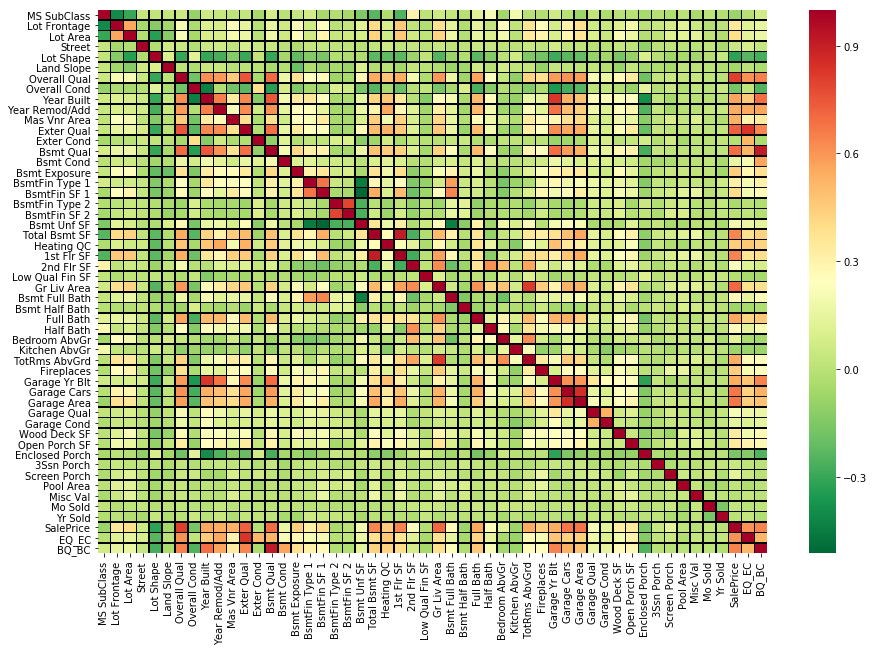

In [85]:
# Create a heatmap of all numerical columns
plt.figure(figsize =(15,10))
sns.heatmap(df_train_num.corr(), cmap='RdYlGn_r',linecolor='black', linewidths=0.5);

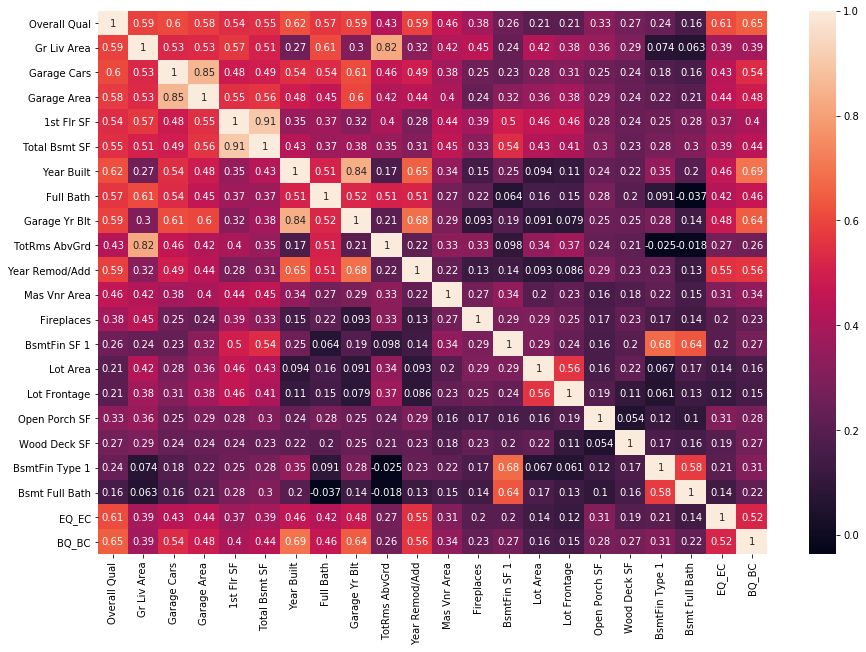

In [86]:
plt.figure(figsize=(15,10))
sns.heatmap(df_train_num[['Overall Qual', 'Gr Liv Area','Garage Cars','Garage Area',
                    '1st Flr SF','Total Bsmt SF','Year Built','Full Bath','Garage Yr Blt','TotRms AbvGrd',
                    'Year Remod/Add','Mas Vnr Area','Fireplaces','BsmtFin SF 1','Lot Area','Lot Frontage',
                    'Open Porch SF','Wood Deck SF','BsmtFin Type 1','Bsmt Full Bath',
                         'EQ_EC','BQ_BC']].corr(), annot= True);

# Check for Multi-Colinearity

### Variance Inflation Factor (VIF)

In [87]:
features = ['Overall Qual', 'Gr Liv Area','Garage Cars','Garage Area','1st Flr SF',
                    'Total Bsmt SF','Year Built','Full Bath','Garage Yr Blt','TotRms AbvGrd',
                    'Year Remod/Add','Mas Vnr Area','Fireplaces','BsmtFin SF 1','Lot Area','Lot Frontage',
                    'Open Porch SF','Wood Deck SF','BsmtFin Type 1','Bsmt Full Bath',
                         'EQ_EC','BQ_BC']
X = df_train_num[features]

In [88]:
X.head()

,Overall Qual,Gr Liv Area,Garage Cars,Garage Area,1st Flr SF,Total Bsmt SF,Year Built,Full Bath,Garage Yr Blt,TotRms AbvGrd,...,Fireplaces,BsmtFin SF 1,Lot Area,Lot Frontage,Open Porch SF,Wood Deck SF,BsmtFin Type 1,Bsmt Full Bath,EQ_EC,BQ_BC
1,7,2122,2.0,559.0,913,913.0,1996,2,1997.0,8,...,1,637.0,11492,43.0,74,0,6,1.0,12,12
2,5,1057,1.0,246.0,1057,1057.0,1953,1,1953.0,5,...,0,731.0,7922,68.0,52,0,6,1.0,12,9
3,5,1444,2.0,400.0,744,384.0,2006,2,2007.0,7,...,0,0.0,9802,73.0,0,100,1,0.0,9,12
4,6,1445,2.0,484.0,831,676.0,1900,2,1957.0,6,...,0,0.0,14235,82.0,59,0,1,0.0,9,8
5,6,1888,2.0,578.0,1888,1517.0,1966,2,1966.0,6,...,1,247.0,16492,137.0,0,0,5,0.0,12,9


In [89]:
X = add_constant(X)

In [90]:
pd.Series([variance_inflation_factor(X.values, i) for i in range(X.shape[1])], index= X.columns)

const             23557.551344
Overall Qual          3.306909
Gr Liv Area           5.526670
Garage Cars           4.616944
Garage Area           4.945547
1st Flr SF            6.626739
Total Bsmt SF         6.819155
Year Built            4.659719
Full Bath             2.343950
Garage Yr Blt         4.735656
TotRms AbvGrd         3.363663
Year Remod/Add        2.408964
Mas Vnr Area          1.490624
Fireplaces            1.442846
BsmtFin SF 1          3.192512
Lot Area              1.743699
Lot Frontage          1.725338
Open Porch SF         1.264022
Wood Deck SF          1.202742
BsmtFin Type 1        2.323393
Bsmt Full Bath        1.883488
EQ_EC                 1.849310
BQ_BC                 2.452519
dtype: float64

In [91]:
df_train_num.drop(['Gr Liv Area','Garage Cars','1st Flr SF','Year Built'], axis=1, inplace = True)

# Dummy Columns

In [92]:
df_cat= pd.get_dummies(df_train_cat, drop_first=True)
df_cat.head()

,MS Zoning_FV,MS Zoning_RH,MS Zoning_RL,MS Zoning_RM,Land Contour_HLS,Land Contour_Low,Land Contour_Lvl,Lot Config_CulDSac,Lot Config_FR2,Lot Config_FR3,...,Paved Drive_P,Paved Drive_Y,Sale Type_CWD,Sale Type_Con,Sale Type_ConLD,Sale Type_ConLI,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_WD
1,0,0,1,0,0,0,1,1,0,0,...,0,1,0,0,0,0,0,0,0,1
2,0,0,1,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1
3,0,0,1,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1
4,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5,0,0,1,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1


In [93]:
df_train_final= pd.concat([df_train_num,df_cat], axis=1)
df_train_final.head()

,MS SubClass,Lot Frontage,Lot Area,Street,Lot Shape,Land Slope,Overall Qual,Overall Cond,Year Remod/Add,Mas Vnr Area,...,Paved Drive_P,Paved Drive_Y,Sale Type_CWD,Sale Type_Con,Sale Type_ConLD,Sale Type_ConLI,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_WD
1,60,43.0,11492,1,3,3,7,5,1997,132.0,...,0,1,0,0,0,0,0,0,0,1
2,20,68.0,7922,1,4,3,5,7,2007,0.0,...,0,1,0,0,0,0,0,0,0,1
3,60,73.0,9802,1,4,3,5,5,2007,0.0,...,0,1,0,0,0,0,0,0,0,1
4,50,82.0,14235,1,3,3,6,8,1993,0.0,...,0,0,0,0,0,0,0,0,0,1
5,20,137.0,16492,1,3,3,6,6,2002,0.0,...,0,1,0,0,0,0,0,0,0,1
